In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
##import psycopg2
import sqlite3
import re
from functools import partial

In [3]:
#set csv file
csv_file = 'intuit_dummy.csv'

In [4]:
#read in df from csv
df = pd.read_csv(csv_file).drop_duplicates()

In [5]:
df['id'] = range(1, len(df) + 1)
df = df.reset_index(drop=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20241 entries, 0 to 20240
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Sign_Up_Date            20241 non-null  object
 1   User_ID                 20241 non-null  int64 
 2   Transactions            20241 non-null  int64 
 3   Expenses                20241 non-null  int64 
 4   Sales                   20241 non-null  int64 
 5   Cash Flow               20241 non-null  int64 
 6   Payroll                 20241 non-null  int64 
 7   Time                    20241 non-null  int64 
 8   Reports                 20241 non-null  int64 
 9   Taxes                   20241 non-null  int64 
 10  Mileage                 20241 non-null  int64 
 11  Accounting              20241 non-null  int64 
 12  My_Accountant           20241 non-null  int64 
 13  Apps                    20241 non-null  int64 
 14  Live_Bookkeeping        20241 non-null  int64 
 15  Tr

In [7]:
df.head(10)

,Sign_Up_Date,User_ID,Transactions,Expenses,Sales,Cash Flow,Payroll,Time,Reports,Taxes,...,Mileage_Usage,Accounting_Usage,My_Accountant_Usage,Apps_Usage,Live_Bookkeeping_Usage,Plan_Type_Usage,Session_Length,Susbcribed,days,id
0,11/26/19,5307,0,0,0,0,0,0,1,0,...,993,1336,1340,1977,1849,2,1207,0,-5,1
1,10/21/19,7364,1,0,1,0,0,0,0,0,...,963,1155,703,1891,71,3,6368,0,-41,2
2,11/26/19,9166,0,1,0,1,0,1,0,1,...,1909,2085,1721,1701,933,1,5482,1,-5,3
3,6/5/19,841,0,0,1,0,1,1,0,1,...,676,1113,1115,1252,442,3,2575,0,-179,4
4,5/24/20,5909,0,1,1,1,0,1,1,1,...,1863,2045,743,947,1920,2,3369,0,175,5
5,2/7/20,9646,0,1,1,1,0,1,0,0,...,860,710,120,1166,192,3,4718,0,68,6
6,6/30/19,3049,1,1,0,1,1,0,1,1,...,1604,1067,1412,227,481,1,3435,1,-154,7
7,8/19/19,9209,0,0,0,0,1,0,0,1,...,1082,2042,719,814,1442,3,6315,1,-104,8
8,10/18/19,9536,0,0,0,1,0,1,0,1,...,1118,2060,1884,912,1410,3,5200,1,-44,9
9,7/2/19,8936,0,0,0,0,0,1,1,1,...,1670,1482,1830,670,690,2,6498,0,-152,10


In [8]:
#summary stats
df.describe()

,User_ID,Transactions,Expenses,Sales,Cash Flow,Payroll,Time,Reports,Taxes,Mileage,...,Mileage_Usage,Accounting_Usage,My_Accountant_Usage,Apps_Usage,Live_Bookkeeping_Usage,Plan_Type_Usage,Session_Length,Susbcribed,days,id
count,20241.000000,20241.000000,20241.000000,20241.000000,20241.000000,20241.000000,20241.000000,20241.000000,20241.000000,20241.000000,...,20241.000000,20241.000000,20241.000000,20241.000000,20241.000000,20241.000000,20241.000000,20241.000000,20241.000000,20241.000000
mean,4990.533570,0.497801,0.500568,0.503384,0.501902,0.494887,0.494640,0.502100,0.501556,0.504669,...,999.853565,1573.374685,998.335161,991.178746,996.849069,1.988044,4042.374734,0.495183,-0.901092,10121.000000
std,2888.986175,0.500008,0.500012,0.500001,0.500009,0.499986,0.499984,0.500008,0.500010,0.499991,...,577.119016,706.416779,577.563271,579.347449,579.248850,0.816611,1923.495916,0.499989,106.085085,5843.217735
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,350.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-183.000000,1.000000
25%,2473.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,502.000000,961.000000,497.000000,488.000000,494.000000,1.000000,2407.000000,0.000000,-92.000000,5061.000000
50%,5000.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1004.000000,1574.000000,999.000000,978.000000,997.000000,2.000000,3999.000000,0.000000,-1.000000,10121.000000
75%,7477.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1496.000000,2186.000000,1500.000000,1493.000000,1501.000000,3.000000,5642.000000,1.000000,91.000000,15181.000000
max,10000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2000.000000,2800.000000,2000.000000,2000.000000,2000.000000,3.000000,7500.000000,1.000000,182.000000,20241.000000


In [9]:
conn = sqlite3.connect("Temp.db") 

In [10]:
#kde services add

df.to_sql('df', conn, if_exists='replace')

statements = ['drop table if exists df_buckets',
'create table df_buckets as \
Select t1.*, \
ntile(10) over (order by Session_Length ASC) as session_length_decile, \
ntile(10) over (order by Taxes_usage ASC) as tax_usage_decile, \
ntile(10) over (order by Payroll_usage ASC) as payroll_usage_decile, \
ntile(10) over (order by Accounting_usage ASC) as accounting_usage_decile \
from \
df as t1 \
',]


for statement in statements:
    conn.execute(statement)

df_buckets = pd.read_sql('select * from df_buckets', conn)   

/Users/paulbarber/Python/lib/python3.9/site-packages/pandas/core/generic.py:2776: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [11]:

sql_string = '\
SELECT session_length_decile, \
Susbcribed, \
payroll_usage_decile, \
accounting_usage_decile, \
tax_usage_decile, \
(accounting_usage_decile+payroll_usage_decile+tax_usage_decile)/3 accounting_payroll_tax_usage_decile, \
avg(case when Taxes+Accounting+Payroll>=1 then 1 else 0 end) tax_payroll_accounting_rate, \
avg(Taxes) tax_rate \
FROM df_buckets \
group by 1,2'
sql_result = pd.read_sql(sql_string, conn)

In [12]:
sql_result = sql_result.rename(columns={"tax_payroll_accounting_rate": "Payroll, Tax, Accounting Rate","session_length_decile": "Session Length Decile" })

<AxesSubplot:xlabel='Session Length Decile'>

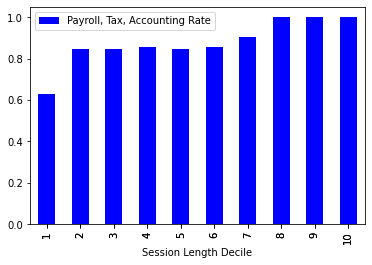

In [13]:
#basic scatter
sql_result.plot(kind='bar',x='Session Length Decile',y='Payroll, Tax, Accounting Rate',color='blue')

In [14]:
kde_violin_df = sql_result
#kde_violin_df['subscribed'] = kde_violin_df['subscribed'].replace(to_replace=0, value=-1)
kde_violin_df['accounting_payroll_usage_tax_decile'] = kde_violin_df['accounting_payroll_tax_usage_decile'].rank(pct=True)


In [15]:
kde_violin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Session Length Decile                20 non-null     int64  
 1   Susbcribed                           20 non-null     int64  
 2   payroll_usage_decile                 20 non-null     int64  
 3   accounting_usage_decile              20 non-null     int64  
 4   tax_usage_decile                     20 non-null     int64  
 5   accounting_payroll_tax_usage_decile  20 non-null     int64  
 6   Payroll, Tax, Accounting Rate        20 non-null     float64
 7   tax_rate                             20 non-null     float64
 8   accounting_payroll_usage_tax_decile  20 non-null     float64
dtypes: float64(3), int64(6)
memory usage: 1.5 KB


In [16]:
kde_violin_df = kde_violin_df.rename(columns={"Susbcribed": "Subscribed"})

In [17]:
kde_violin_df = kde_violin_df.rename(columns={"accounting_payroll_tax_usage_decile": "Accounting, Payroll, Tax Decile"})

In [18]:
help(sns.violinplot)

Help on function violinplot in module seaborn.categorical:

violinplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs)
    Draw a combination of boxplot and kernel density estimate.
    
    A violin plot plays a similar role as a box and whisker plot. It shows the
    distribution of quantitative data across several levels of one (or more)
    categorical variables such that those distributions can be compared. Unlike
    a box plot, in which all of the plot components correspond to actual
    datapoints, the violin plot features a kernel density estimation of the
    underlying distribution.
    
    This can be an effective and attractive way to show multiple distributions
    of data at once, but keep in mind that the estimation procedure is
    influenced by the

In [19]:
intu_col = {Subscribed: "royalblue" if Subscribed == 1 else "skyblue" for Subscribed in kde_violin_df.Subscribed.unique()}

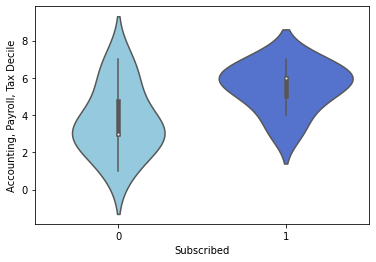

In [20]:
sns.violinplot(x="Subscribed", y="Accounting, Payroll, Tax Decile", data=kde_violin_df, palette=intu_col);

In [21]:
pd.DataFrame(np.array(pd.read_csv('random_array.csv', header=None))).applymap(lambda x: '{:.1%}'.format(x)).values

array([['100.0%', '31.8%', '23.0%', '48.0%', '33.1%', '33.8%', '0.5%',
        '23.2%', '44.5%', '6.8%', '51.0%', '33.4%', '64.5%'],
       ['32.0%', '100.0%', '40.4%', '60.9%', '56.1%', '4.9%', '6.0%',
        '42.6%', '28.2%', '0.4%', '43.4%', '45.6%', '59.0%'],
       ['0.5%', '6.0%', '100.0%', '82.0%', '43.2%', '45.8%', '25.9%',
        '34.9%', '43.9%', '12.5%', '17.7%', '63.8%', '14.5%'],
       ['25.9%', '46.0%', '82.0%', '100.0%', '4.2%', '32.2%', '8.0%',
        '56.6%', '43.8%', '31.3%', '9.8%', '56.1%', '40.1%'],
       ['41.0%', '38.8%', '25.3%', '35.6%', '100.0%', '55.8%', '40.2%',
        '50.8%', '20.9%', '35.0%', '10.3%', '56.3%', '56.2%'],
       ['57.5%', '51.9%', '13.5%', '32.9%', '13.1%', '100.0%', '7.2%',
        '36.0%', '15.1%', '53.7%', '45.0%', '55.9%', '53.9%'],
       ['60.0%', '44.7%', '26.1%', '5.1%', '33.8%', '29.7%', '100.0%',
        '17.2%', '14.4%', '24.0%', '90.0%', '17.5%', '46.6%'],
       ['1.0%', '13.7%', '2.5%', '62.3%', '39.7%', '10.1%', '3.4%',

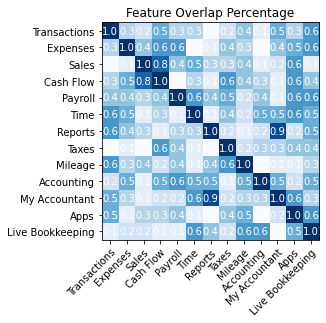

In [26]:
import matplotlib.pyplot as plt

features_x = ["Transactions","Expenses","Sales","Cash Flow","Payroll","Time","Reports","Taxes","Mileage","Accounting","My Accountant","Apps","Live Bookkeeping"]
features_y = ["Transactions","Expenses","Sales","Cash Flow","Payroll","Time","Reports","Taxes","Mileage","Accounting","My Accountant","Apps","Live Bookkeeping"]

feature_overlap = np.array(pd.read_csv('random_array.csv', header=None).round(1))


fig, ax = plt.subplots()
im = ax.imshow(feature_overlap)

ax.set_xticks(np.arange(len(features_x)))
ax.set_yticks(np.arange(len(features_y)))


ax.set_xticklabels(features_x)
ax.set_yticklabels(features_y)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")


for i in range(len(features_x)):
    for j in range(len(features_x)):
        text = ax.text(j, i, feature_overlap[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Feature Overlap Percentage")
plt.set_cmap("Blues")
plt.show()

In [23]:
#statsmodels OLS reg
lin_reg = sm.OLS(pd.read_csv('Session_Length_Data.csv')['Tax, Accounting, Payroll Usage'],pd.read_csv('Session_Length_Data.csv')['Percentile Rank Session Length']).fit()

In [24]:
print (lin_reg.summary())

                                       OLS Regression Results                                      
Dep. Variable:     Tax, Accounting, Payroll Usage   R-squared (uncentered):                   0.854
Model:                                        OLS   Adj. R-squared (uncentered):              0.854
Method:                             Least Squares   F-statistic:                              5929.
Date:                            Thu, 14 Jan 2021   Prob (F-statistic):                        0.00
Time:                                    10:17:25   Log-Likelihood:                         -4631.0
No. Observations:                            1011   AIC:                                      9264.
Df Residuals:                                1010   BIC:                                      9269.
Df Model:                                       1                                                  
Covariance Type:                        nonrobust                                                  


<AxesSubplot:xlabel='Tax, Accounting, Payroll Usage', ylabel='Percentile Rank Session Length'>

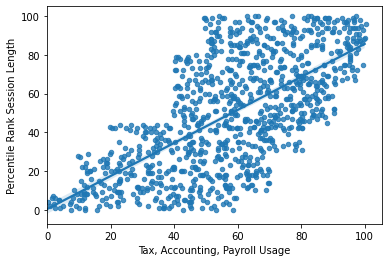

In [28]:
sns.regplot(x='Tax, Accounting, Payroll Usage', y='Percentile Rank Session Length', data=pd.read_csv('Session_Length_Data.csv'), scatter_kws={'s':20}, x_jitter=0.5)